**Importance of the Proposal in Today's World:**

In the modern financial landscape, the proposed project holds immense importance. The banking sector, especially the credit card department, is increasingly adopting data science techniques to make informed decisions. Predicting the creditworthiness of potential clients is essential for mitigating risk and ensuring responsible lending practices. In a world where financial transactions are increasingly digital, accurate credit assessment becomes critical to prevent credit defaults, fraud, and financial instability.

**Predicting a Good Client's Worth for a Bank:**

Predicting a good client is of paramount importance for a bank due to the following reasons:
1. **Risk Mitigation:** Banks need to ensure that credit is extended to individuals who are likely to honor their commitments. Predicting a good client reduces the risk of defaults, which can lead to financial losses.
2. **Cost Efficiency:** Assessing a client's creditworthiness beforehand reduces the need for costly recovery processes and legal actions in the case of defaults.
3. **Resource Optimization:** By focusing on clients with a higher likelihood of repayment, banks can optimize their resources, ensuring better utilization of funds and manpower.
4. **Customer Relationship:** Responsible lending enhances customer satisfaction and trust in the bank's services, fostering long-term relationships.
5. **Regulatory Compliance:** Regulatory bodies emphasize responsible lending, and accurately predicting good clients helps banks comply with these regulations.

**Impact on the Banking Sector:**

The proposed project's impact on the banking sector is substantial:
1. **Enhanced Decision-Making:** By leveraging data science and predictive analytics, banks can make more informed credit card approval decisions, reducing the likelihood of defaults and fraud.
2. **Improved Customer Experience:** Accurate credit assessment ensures that clients are offered credit lines that match their financial capacity, leading to better customer experiences.
3. **Reduced Default Rates:** Predicting good clients contributes to lower default rates, minimizing financial losses and maintaining the bank's stability.
4. **Efficiency Gains:** Data-driven credit assessment streamlines the approval process, reducing manual intervention and paperwork, thereby saving time and resources.
5. **Competitive Advantage:** Banks with advanced credit assessment methods can offer more competitive products, attracting a larger customer base.

**Gap in Knowledge and Future Relevance:**

The proposed method bridges a gap in knowledge by leveraging both internal and external data to enhance credit judgments. Traditional credit assessment methods often rely on limited data sources, which may not provide a comprehensive view of an applicant's creditworthiness. By integrating various features like income, education, and employment history, the proposed method can offer a more holistic evaluation. As data availability and analytics capabilities continue to evolve, this approach can serve as a future-proof framework for credit assessment in any bank in India. The methodology's adaptability and reliance on data-driven insights position it as a forward-looking solution that can be refined and expanded as more data sources become accessible.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy
from scipy import stats
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings
# it is important when we are done with project otherwise do not call this and try to understand the warnings.

In [ ]:
f= pd.read_csv('/content/Credit_card.csv')
d1 = pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
d3 = pd.merge(f,d1) #Merging of two dataset

In [ ]:
d = d3.copy() #creating a copy of data
d.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


**#Examining few basic observations and features:**

In [ ]:
d.shape

(1548, 19)

We have 1548 observation and 19 attributes.

In [ ]:
d.drop_duplicates #to remove duplicates
d.shape

(1548, 19)

There are no duplicate value.

In [ ]:
d.columns #checking column names

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

Some columns name required to be rename.



In [ ]:
d = d.rename(columns={"Ind_ID": "Ind_id", "GENDER":"Gender","Car_Owner":"Car_owner", "EDUCATION":"Education","Propert_Owner":"Property_owner","CHILDREN":"Children","Type_Income":"Income_type","Work_Phone":"Work_phone","EMAIL_ID":"Email_id","Birthday_count":"Age","Employed_days":"Employee_exp","Type_Occupation":"Occupation_type","Family_Members":"Family_members"})
d.head() #Renaming of column name

,Ind_id,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Age,Employee_exp,Mobile_phone,Work_phone,Phone,Email_id,Occupation_type,Family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
d=d.drop(['Phone','Mobile_phone','Work_phone','Email_id'], axis =1) # to remove unwanted column
d.head()

,Ind_id,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Age,Employee_exp,Occupation_type,Family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


In [ ]:
d.dtypes # to check on the datatypes

Ind_id               int64
Gender              object
Car_owner           object
Property_owner      object
Children             int64
Annual_income      float64
Income_type         object
Education           object
Marital_status      object
Housing_type        object
Age                float64
Employee_exp         int64
Occupation_type     object
Family_members       int64
label                int64
dtype: object

In [ ]:
d.nunique() #to check on the unique value in each coloumn

Ind_id             1548
Gender                2
Car_owner             2
Property_owner        2
Children              6
Annual_income       115
Income_type           4
Education             5
Marital_status        5
Housing_type          6
Age                1270
Employee_exp        956
Occupation_type      18
Family_members        7
label                 2
dtype: int64

In [ ]:
d['Age']=abs(round((d['Age']/-365),0)) #to calculate the exact age

In [ ]:
d['Employee_exp']=abs(round((d['Employee_exp']/-365),0))  #to calculate the exact number of days
d

,Ind_id,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Age,Employee_exp,Occupation_type,Family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,33.0,6.0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,7.0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,Drivers,2,0


In [ ]:
d.describe(include='all') #to get the summary of data

,Ind_id,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Age,Employee_exp,Occupation_type,Family_members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,43.952818,174.844315,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,11.603295,372.211315,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,21.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,34.000000,3.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,43.000000,7.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,54.000000,17.000000,NaN,3.000000,0.000000


***Univariate Analysis***

F    973
M    568
Name: Gender, dtype: int64


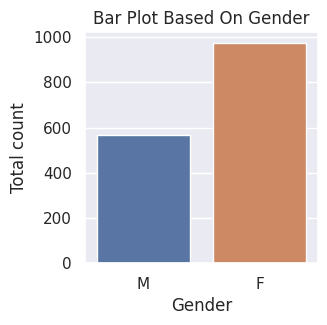

In [ ]:
# gender distribution
gender_count= d['Gender'].value_counts() # count for different jobs categories
print(gender_count) # print
sns.set(rc = {'figure.figsize':(3,3)}) #set figure size
sns.countplot(x='Gender', data=d) # x axis is job column.
plt.title("Bar Plot Based On Gender")#title
plt.xlabel("Gender")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

The difference between male to female members is about 26.30%.

N    924
Y    624
Name: Car_owner, dtype: int64


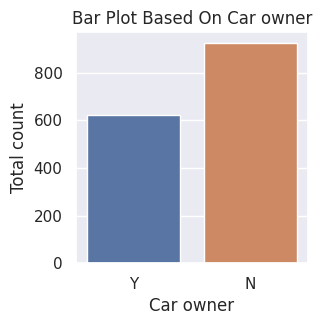

In [ ]:
# Car owner distribution
Carowner_count= d['Car_owner'].value_counts() # count for different jobs categories
print(Carowner_count) # print
sns.set(rc = {'figure.figsize':(3,3)}) #set figure size
sns.countplot(x='Car_owner', data=d) # x axis is job column.
plt.title("Bar Plot Based On Car owner")#title
plt.xlabel("Car owner")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

Out of 1548 members, only 624 members are car_owner.

Y    1010
N     538
Name: Property_owner, dtype: int64


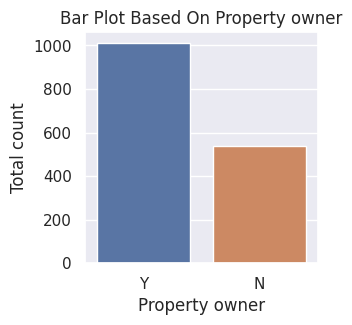

In [ ]:
# Property owner distribution
Propertyowner_count= d['Property_owner'].value_counts() # count for different jobs categories
print(Propertyowner_count) # print
sns.set(rc = {'figure.figsize':(3,3)}) #set figure size
sns.countplot(x='Property_owner', data=d) # x axis is job column.
plt.title("Bar Plot Based On Property owner")#title
plt.xlabel("Property owner")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

Maximum members have their own property(1010 members in total).

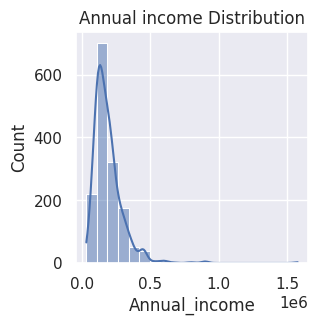

In [ ]:
# Annual income distribution
plt.figure(figsize=(3,3))
sns.histplot(data=d,x='Annual_income', kde=True,bins=20,fill=True)
plt.title('Annual income Distribution')
plt.show()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Income_type, dtype: int64


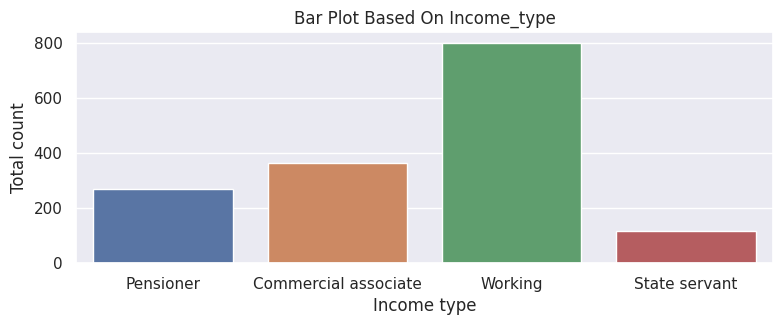

In [ ]:
# Income type distribution
Incometype_count= d['Income_type'].value_counts() # count for different jobs categories
print(Incometype_count) # print
sns.set(rc = {'figure.figsize':(9,3)}) #set figure size
sns.countplot(x='Income_type', data=d) # x axis is job column.
plt.title("Bar Plot Based On Income_type")#title
plt.xlabel("Income type")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64


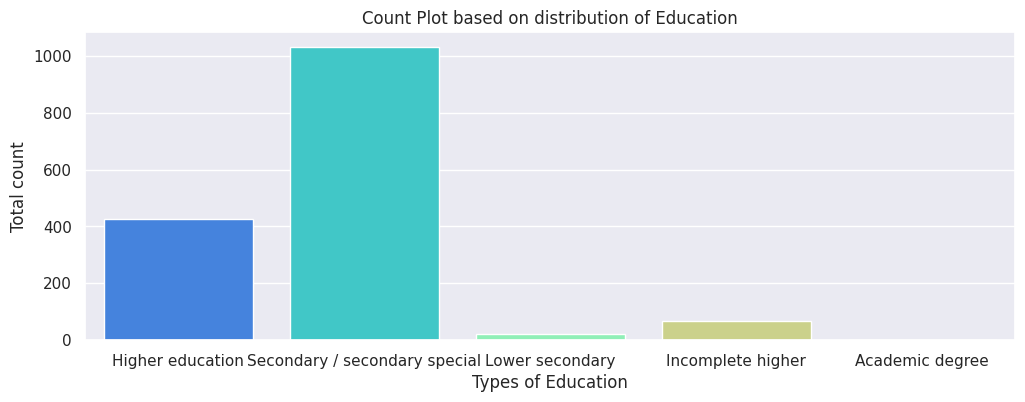

In [ ]:
# Education distribution
Education_count = d['Education'].value_counts()
print(Education_count)
sns.set(rc = {'figure.figsize':(12,4)}) #set figure size
sns.countplot(x='Education', data=d,palette='rainbow') # x axis is job column.
plt.title("Count Plot based on distribution of Education")#title
plt.xlabel("Types of Education")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64


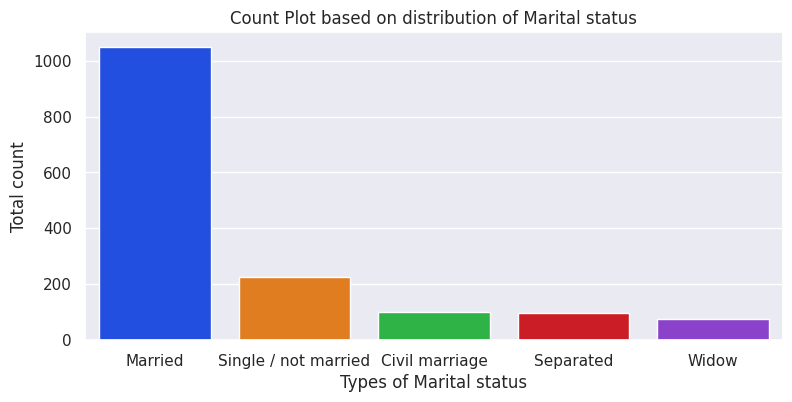

In [ ]:
# Marital status distribution
Maritalstatus_count = d['Marital_status'].value_counts()
print(Maritalstatus_count)
sns.set(rc = {'figure.figsize':(9,4)}) #set figure size
sns.countplot(x='Marital_status', data=d, palette='bright') # x axis is job column.
plt.title("Count Plot based on distribution of Marital status")#title
plt.xlabel("Types of Marital status")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64


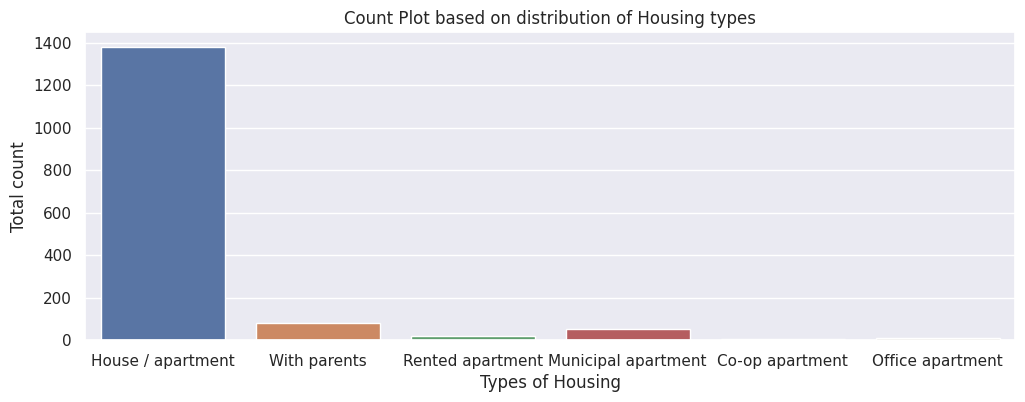

In [ ]:
# Housing type distribution
Housingtype_count = d['Housing_type'].value_counts()
print(Housingtype_count)
sns.set(rc = {'figure.figsize':(12,4)}) #set figure size
sns.countplot(x='Housing_type', data=d) # x axis is job column.
plt.title("Count Plot based on distribution of Housing types")#title
plt.xlabel("Types of Housing")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

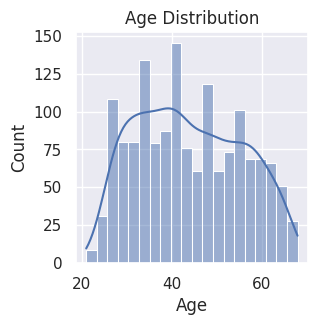

In [ ]:
# Age distribution
plt.figure(figsize=(3,3))
sns.histplot(data=d,x='Age', kde=True,bins=20,fill=True)
plt.title('Age Distribution')
plt.show()

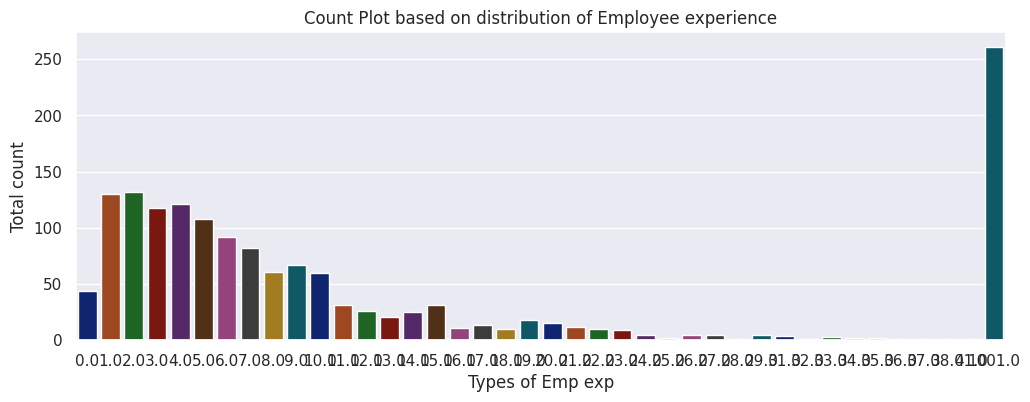

In [ ]:
#Employee experience distribution
sns.set(rc = {'figure.figsize':(12,4)}) #set figure size
sns.countplot(x='Employee_exp', data=d, palette='dark') # x axis is job column.
plt.title("Count Plot based on distribution of Employee experience")#title
plt.xlabel("Types of Emp exp")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

Text(0.5, 1.0, 'Distribution of employee experience using violinplot')

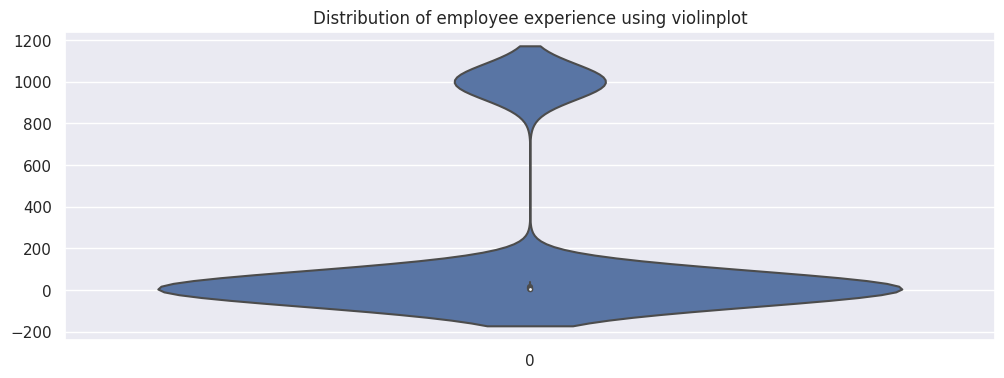

In [ ]:
sns.violinplot(d['Employee_exp'])
plt.title('Distribution of employee experience using violinplot')

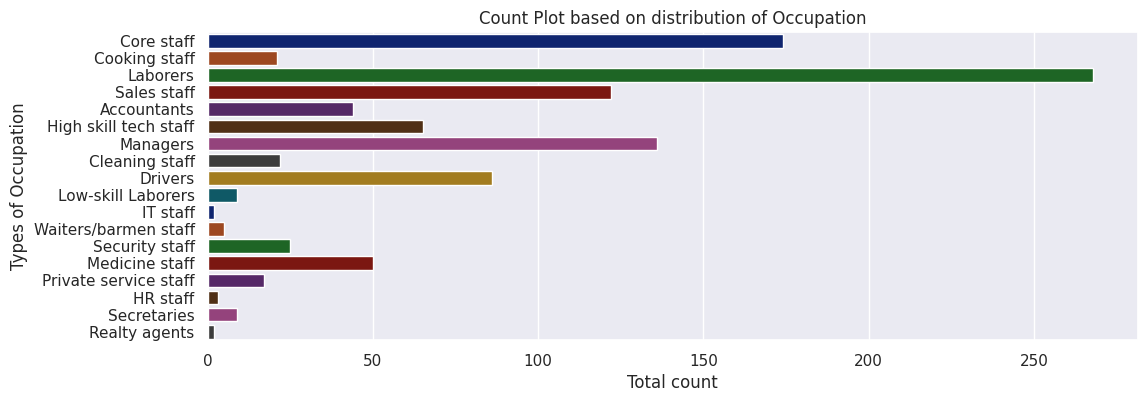

In [ ]:
# Occupation type distribution
Occupationtype_count = d['Occupation_type'].value_counts()
sns.set(rc = {'figure.figsize':(12,4)}) #set figure size
sns.countplot(y='Occupation_type', data=d, palette='dark') # x axis is job column.
plt.title("Count Plot based on distribution of Occupation")#title
plt.xlabel("Total count")#Label for x axis
plt.ylabel("Types of Occupation")#Label for y axis
plt.show() #show the plot

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_members, dtype: int64


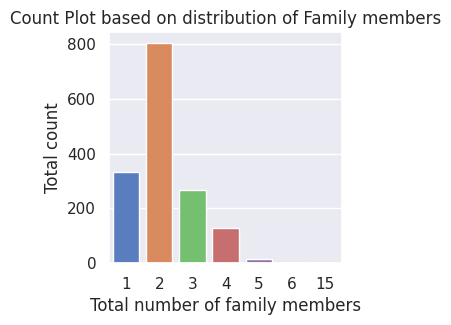

In [ ]:
# Family members distribution
Familymem_count = d['Family_members'].value_counts()
print(Familymem_count)
sns.set(rc = {'figure.figsize':(3,3)}) #set figure size
sns.countplot(x='Family_members', data=d, palette='muted') # x axis is job column.
plt.title("Count Plot based on distribution of Family members")#title
plt.xlabel("Total number of family members")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

0    1373
1     175
Name: label, dtype: int64


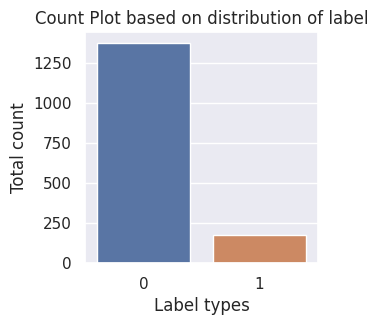

In [ ]:
# label distribution
label_count = d['label'].value_counts()
print(label_count)
sns.set(rc = {'figure.figsize':(3,3)}) #set figure size
sns.countplot(x='label', data=d) # x axis is job column.
plt.title("Count Plot based on distribution of label")#title
plt.xlabel("Label types")#Label for x axis
plt.ylabel("Total count")#Label for y axis
plt.show() #show the plot

**Bivariate Analysis**

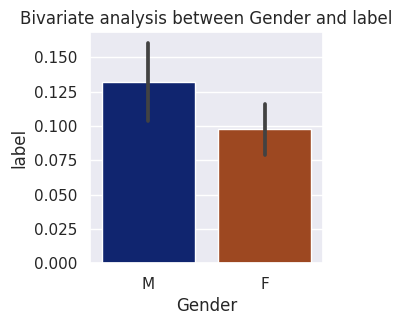

In [ ]:
#Analysis between Gender and label
plt.figure(figsize=(3,3))
sns.barplot(x='Gender',y='label', data=d, palette='dark')
plt.title('Bivariate analysis between Gender and label')
plt.show()

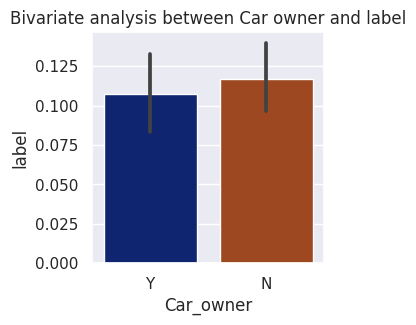

In [ ]:
#Analysis between Carowner and label
plt.figure(figsize=(3,3))
sns.barplot(x='Car_owner',y='label', data=d,palette='dark')
plt.title('Bivariate analysis between Car owner and label')
plt.show()

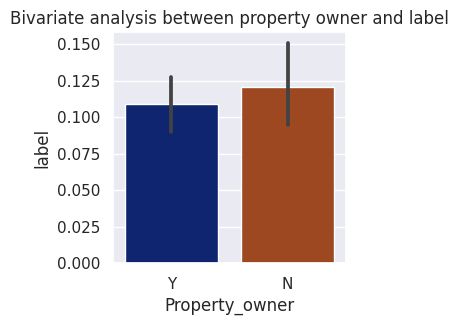

In [ ]:
#Analysis between Property owner and label
plt.figure(figsize=(3,3))
sns.barplot(x='Property_owner',y='label', data=d,palette='dark')
plt.title('Bivariate analysis between property owner and label')
plt.show()

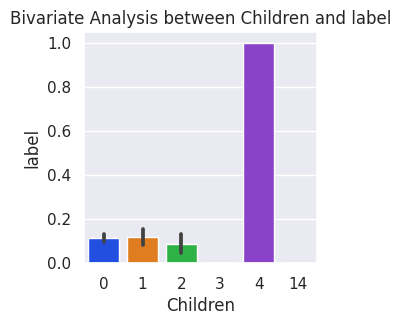

In [ ]:
#Analysis between Children owner and label
plt.figure(figsize=(3,3))
sns.barplot(x='Children',y='label', data=d,palette='bright')
plt.title('Bivariate Analysis between Children and label')
plt.show()

Text(0.5, 1.0, 'Bivariate Analysis on Annual income vs Label using Boxplot')

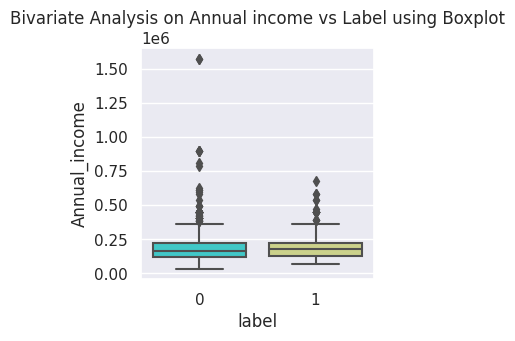

In [ ]:
#Analysis between Annual income vs label
sns.boxplot(x='label', y ='Annual_income',data=d,palette='rainbow')
plt.title('Bivariate Analysis on Annual income vs Label using Boxplot') #title

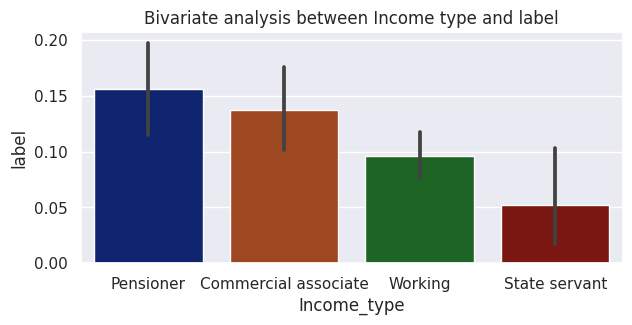

In [ ]:
# Analysis between income type and label
plt.figure(figsize=(7,3))
sns.barplot(x='Income_type',y='label', data=d,palette='dark')
plt.title('Bivariate analysis between Income type and label')
plt.xticks(rotation=90)
plt.show()

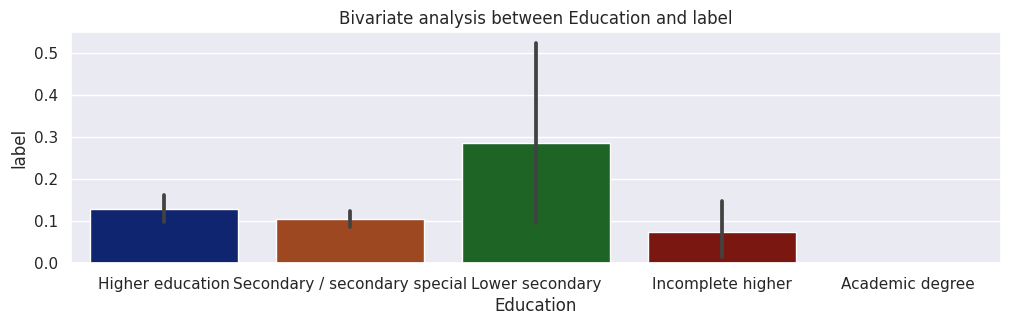

In [ ]:
#Analysis between Education and label
plt.figure(figsize=(12,3))
sns.barplot(x='Education',y='label', data=d,palette='dark')
plt.title('Bivariate analysis between Education and label')
plt.show()

Text(0.5, 1.0, 'Bivariate analysis between Marital status and label')

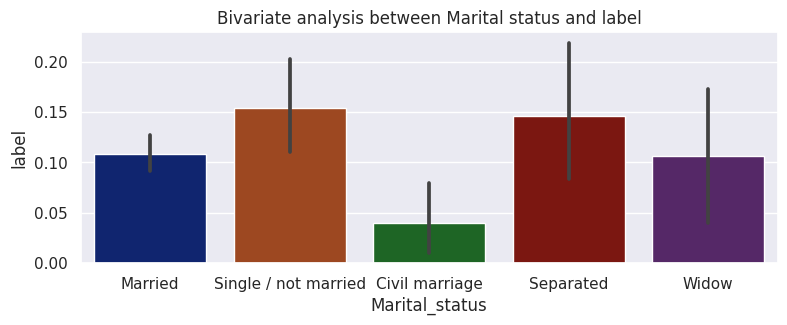

In [ ]:
#Analysis between Marital status and label
plt.figure(figsize=(9,3))
sns.barplot(x='Marital_status',y='label', data=d,palette='dark')
plt.title('Bivariate analysis between Marital status and label')

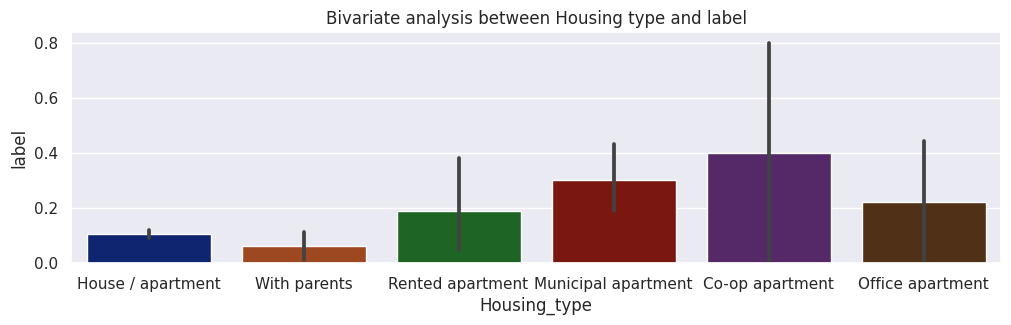

In [ ]:
#Analysis between Housing_type and label
plt.figure(figsize=(12,3))
sns.barplot(x='Housing_type',y='label', data=d,palette='dark')
plt.title('Bivariate analysis between Housing type and label')
plt.show()

Text(0.5, 1.0, 'Bivariate Analysis on Age vs Label using boxplot')

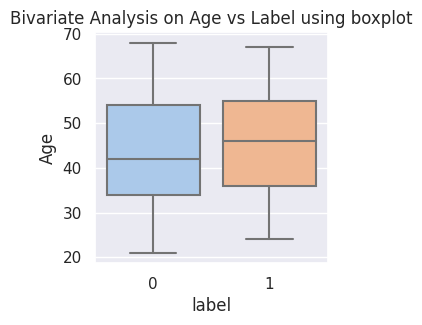

In [ ]:
#Analysis between Age vs label
sns.boxplot(x='label', y ='Age',data=d,palette='pastel')
plt.title('Bivariate Analysis on Age vs Label using boxplot') #title

Text(0.5, 1.0, 'Bivariate Analysis on Employee experience vs Label using violinplot')

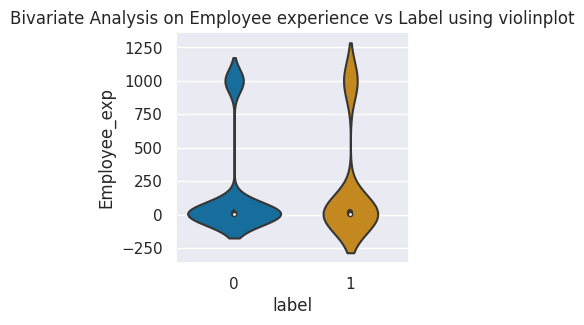

In [ ]:
#Analysis between Employee experience vs label
sns.violinplot(x='label', y ='Employee_exp',data=d,palette='colorblind')
plt.title('Bivariate Analysis on Employee experience vs Label using violinplot')

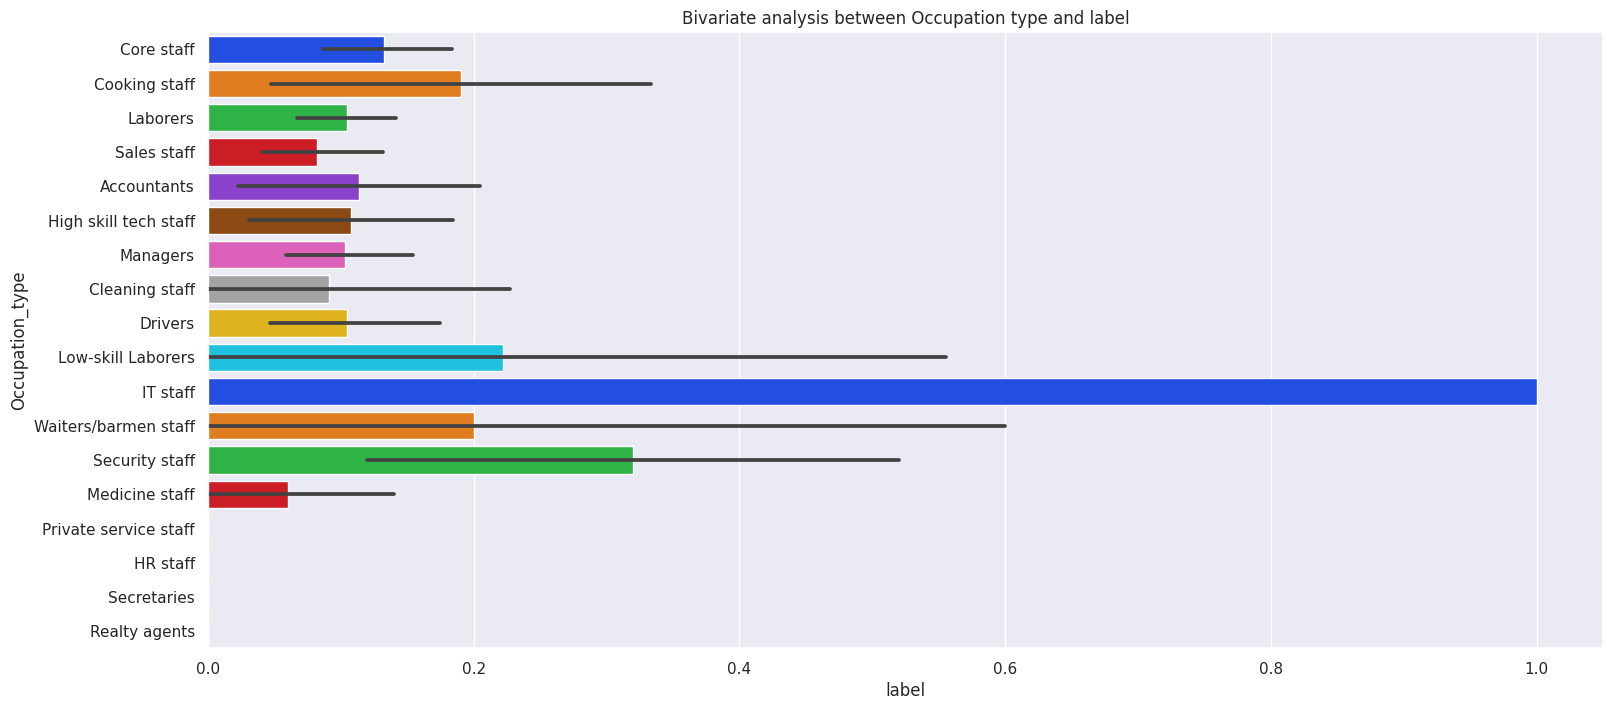

In [ ]:
#Analysis between Occupation type and label
plt.figure(figsize=(18,8))
sns.barplot(x='label',y='Occupation_type', data=d, palette='bright')
plt.title('Bivariate analysis between Occupation type and label')
plt.show()

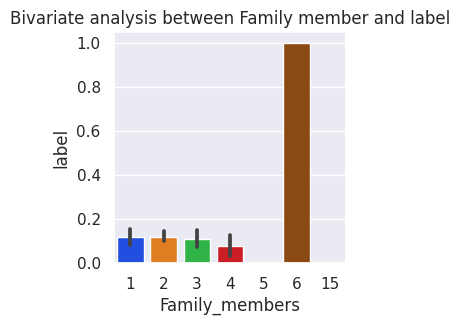

In [ ]:
#Analysis between Family member type and label
plt.figure(figsize=(3,3))
sns.barplot(x='Family_members',y='label', data=d, palette='bright')
plt.title('Bivariate analysis between Family member and label')
plt.show()

**Multivariate Analysis**

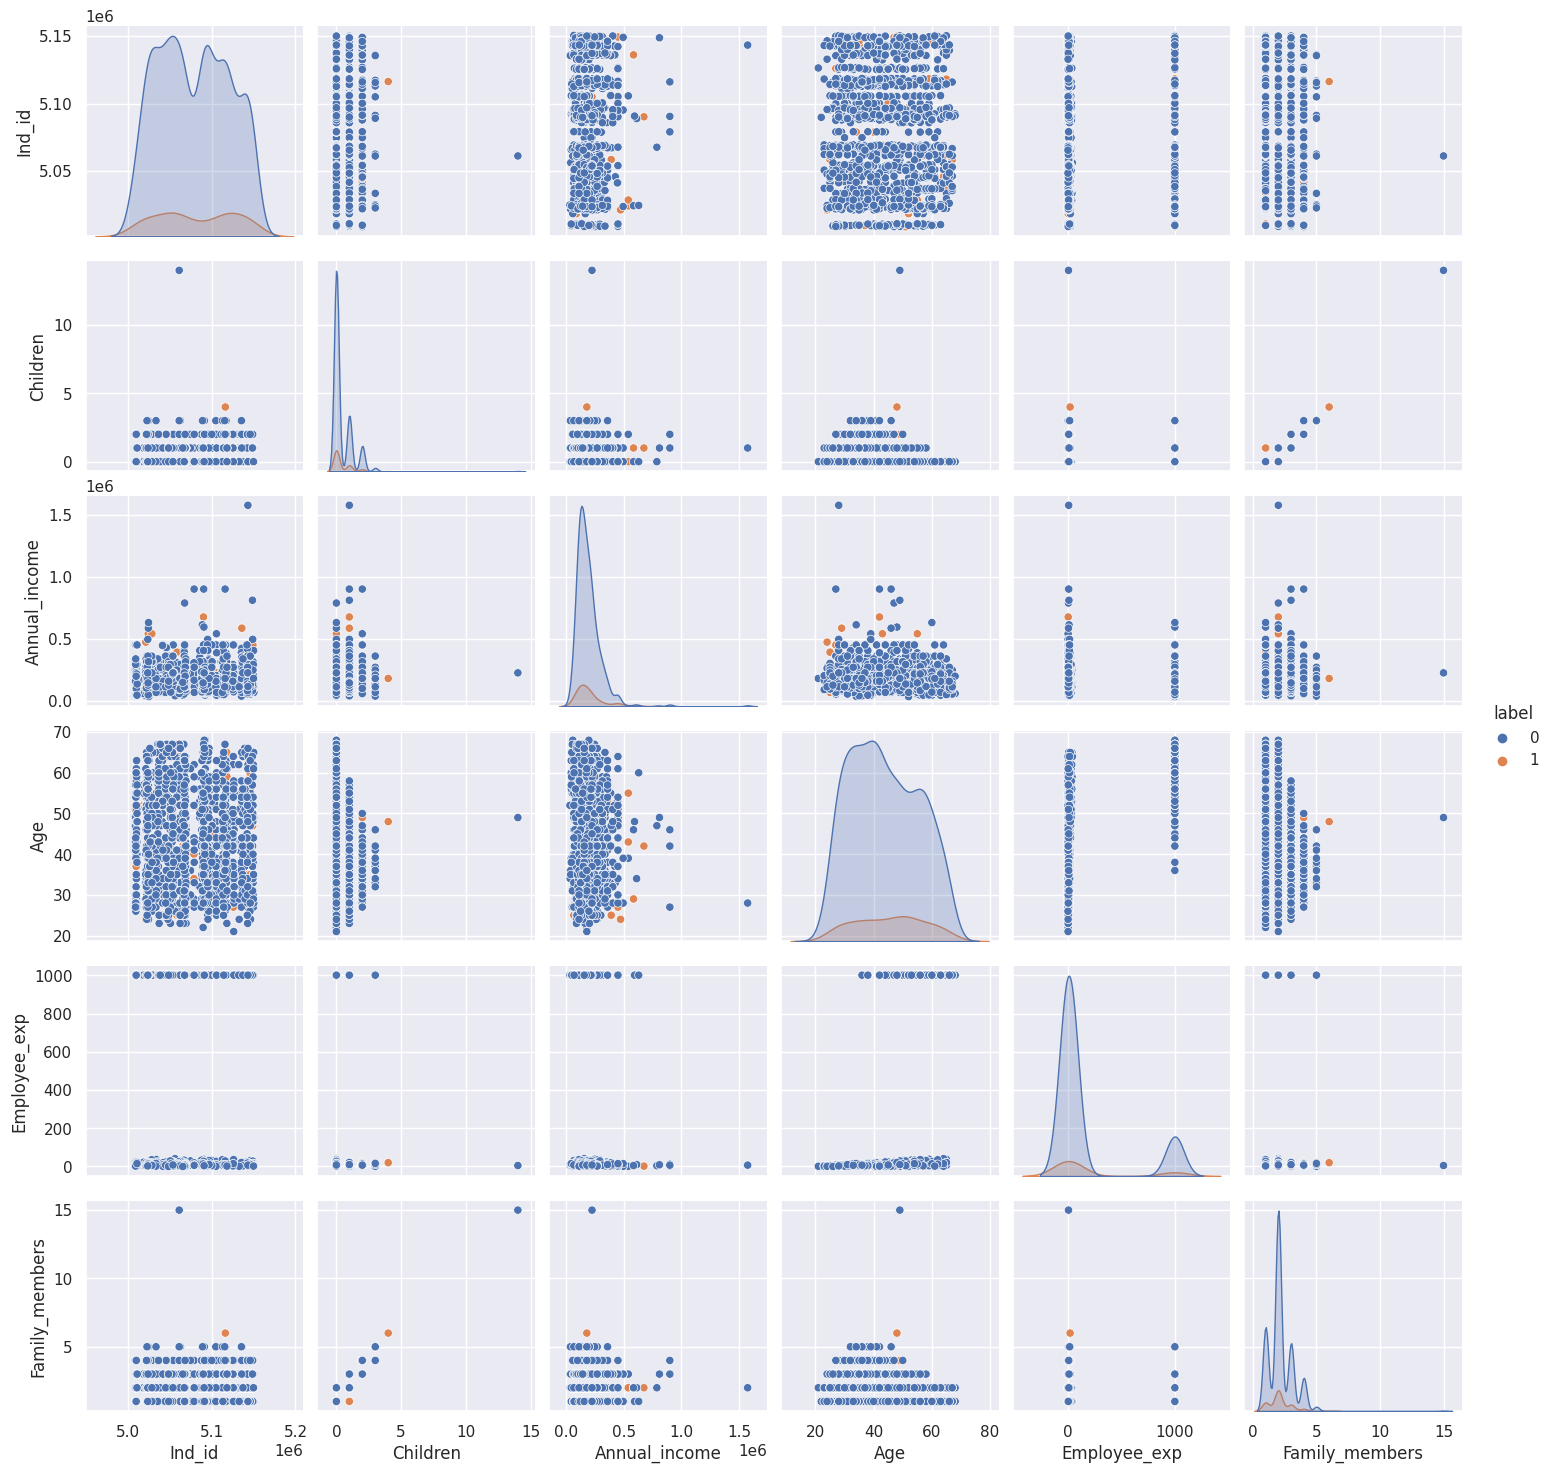

In [ ]:
sns.pairplot(d,hue='label')

Ind_id               Axes(0.125,0.712609;0.168478x0.167391)
Children          Axes(0.327174,0.712609;0.168478x0.167391)
Annual_income     Axes(0.529348,0.712609;0.168478x0.167391)
Age               Axes(0.731522,0.712609;0.168478x0.167391)
Employee_exp         Axes(0.125,0.511739;0.168478x0.167391)
Family_members    Axes(0.327174,0.511739;0.168478x0.167391)
label             Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

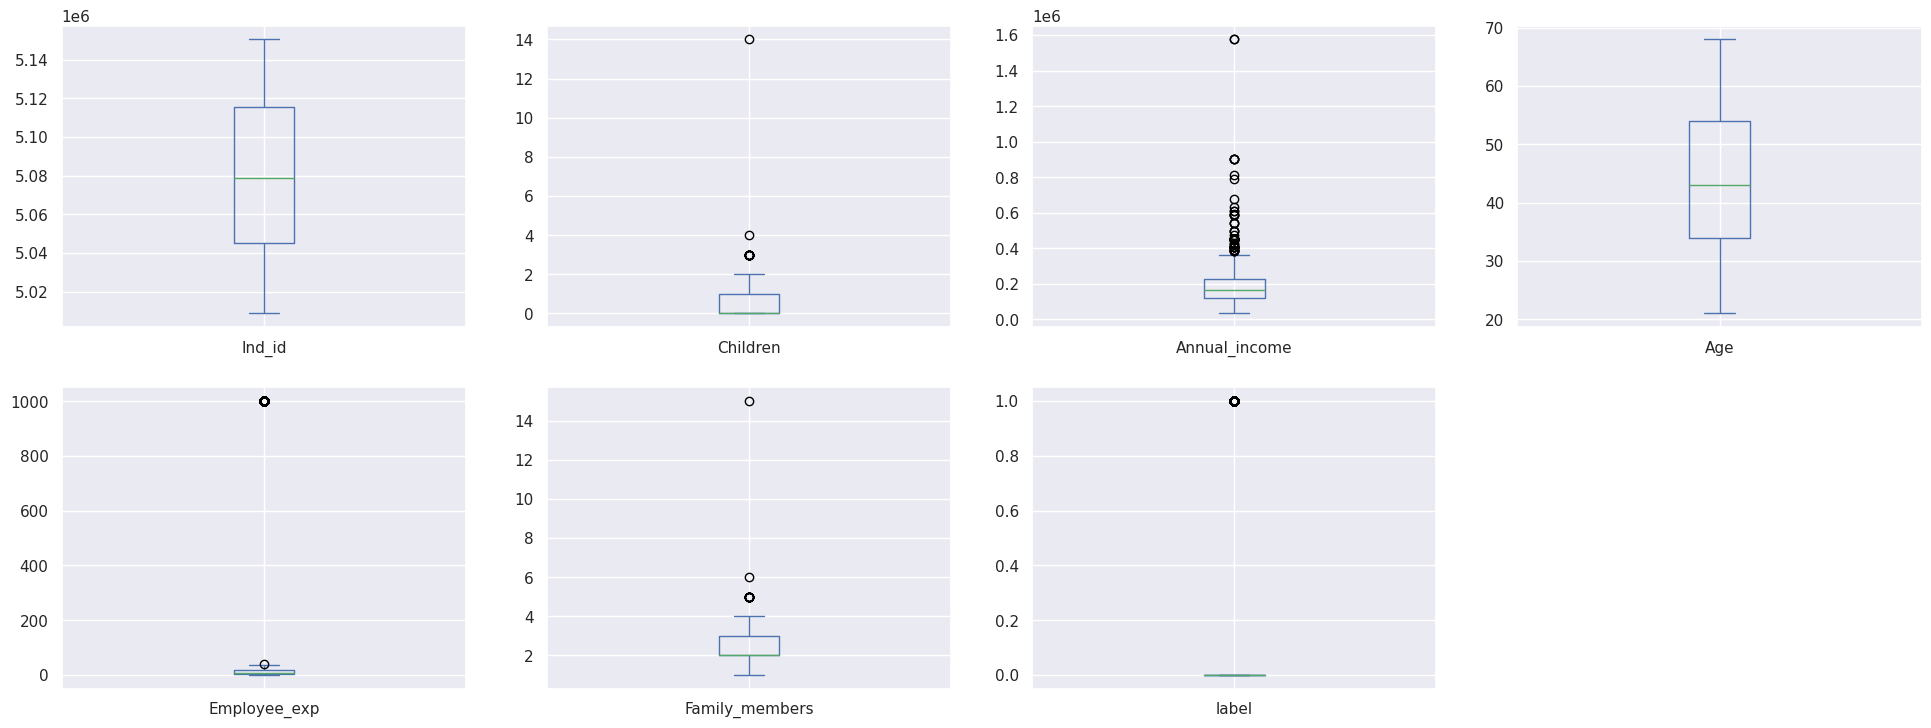

In [ ]:
d.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(24, 18))


**Heat Map:**
Here, I am using pearson coefficient heatmap as the dataset is not ordinal.

In [ ]:
d.corr() # By default it is a person correlation
# We only use numerical values, here we also have categorical values

,Ind_id,Children,Annual_income,Age,Employee_exp,Family_members,label
Ind_id,1.000000,0.032535,0.030147,-0.022150,-0.055900,0.016950,0.016796
Children,0.032535,1.000000,0.078497,-0.278516,-0.219702,0.890248,-0.021646
Annual_income,0.030147,0.078497,1.000000,-0.111294,-0.160732,0.050957,0.027456
Age,-0.022150,-0.278516,-0.111294,1.000000,0.626978,-0.265000,0.045112
Employee_exp,-0.055900,-0.219702,-0.160732,0.626978,1.000000,-0.238921,0.028468
Family_members,0.016950,0.890248,0.050957,-0.265000,-0.238921,1.000000,-0.030709
label,0.016796,-0.021646,0.027456,0.045112,0.028468,-0.030709,1.000000


In [ ]:
import plotly.figure_factory as ff
d_corr =d.corr() # Generate correlation matrix for pearson correlation

x = list(d_corr.columns)
y = list(d_corr.index)
z = np.array(d_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

## **Analysing the amount of Missing Values**

In [ ]:
d_missing=d.isnull()
d_missing

,Ind_id,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Age,Employee_exp,Occupation_type,Family_members,label
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Here, True means nullvalue and False means exact value.

In [ ]:
d_missing.sum() #to find out the total number of null value in each attributes.

Ind_id               0
Gender               7
Car_owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employee_exp         0
Occupation_type    488
Family_members       0
label                0
dtype: int64

Gender, annual income and occupation type has null values.

In [ ]:
d_missing.mean()*100 #to get the percentage of missing values

Ind_id              0.000000
Gender              0.452196
Car_owner           0.000000
Property_owner      0.000000
Children            0.000000
Annual_income       1.485788
Income_type         0.000000
Education           0.000000
Marital_status      0.000000
Housing_type        0.000000
Age                 1.421189
Employee_exp        0.000000
Occupation_type    31.524548
Family_members      0.000000
label               0.000000
dtype: float64

<Axes: >

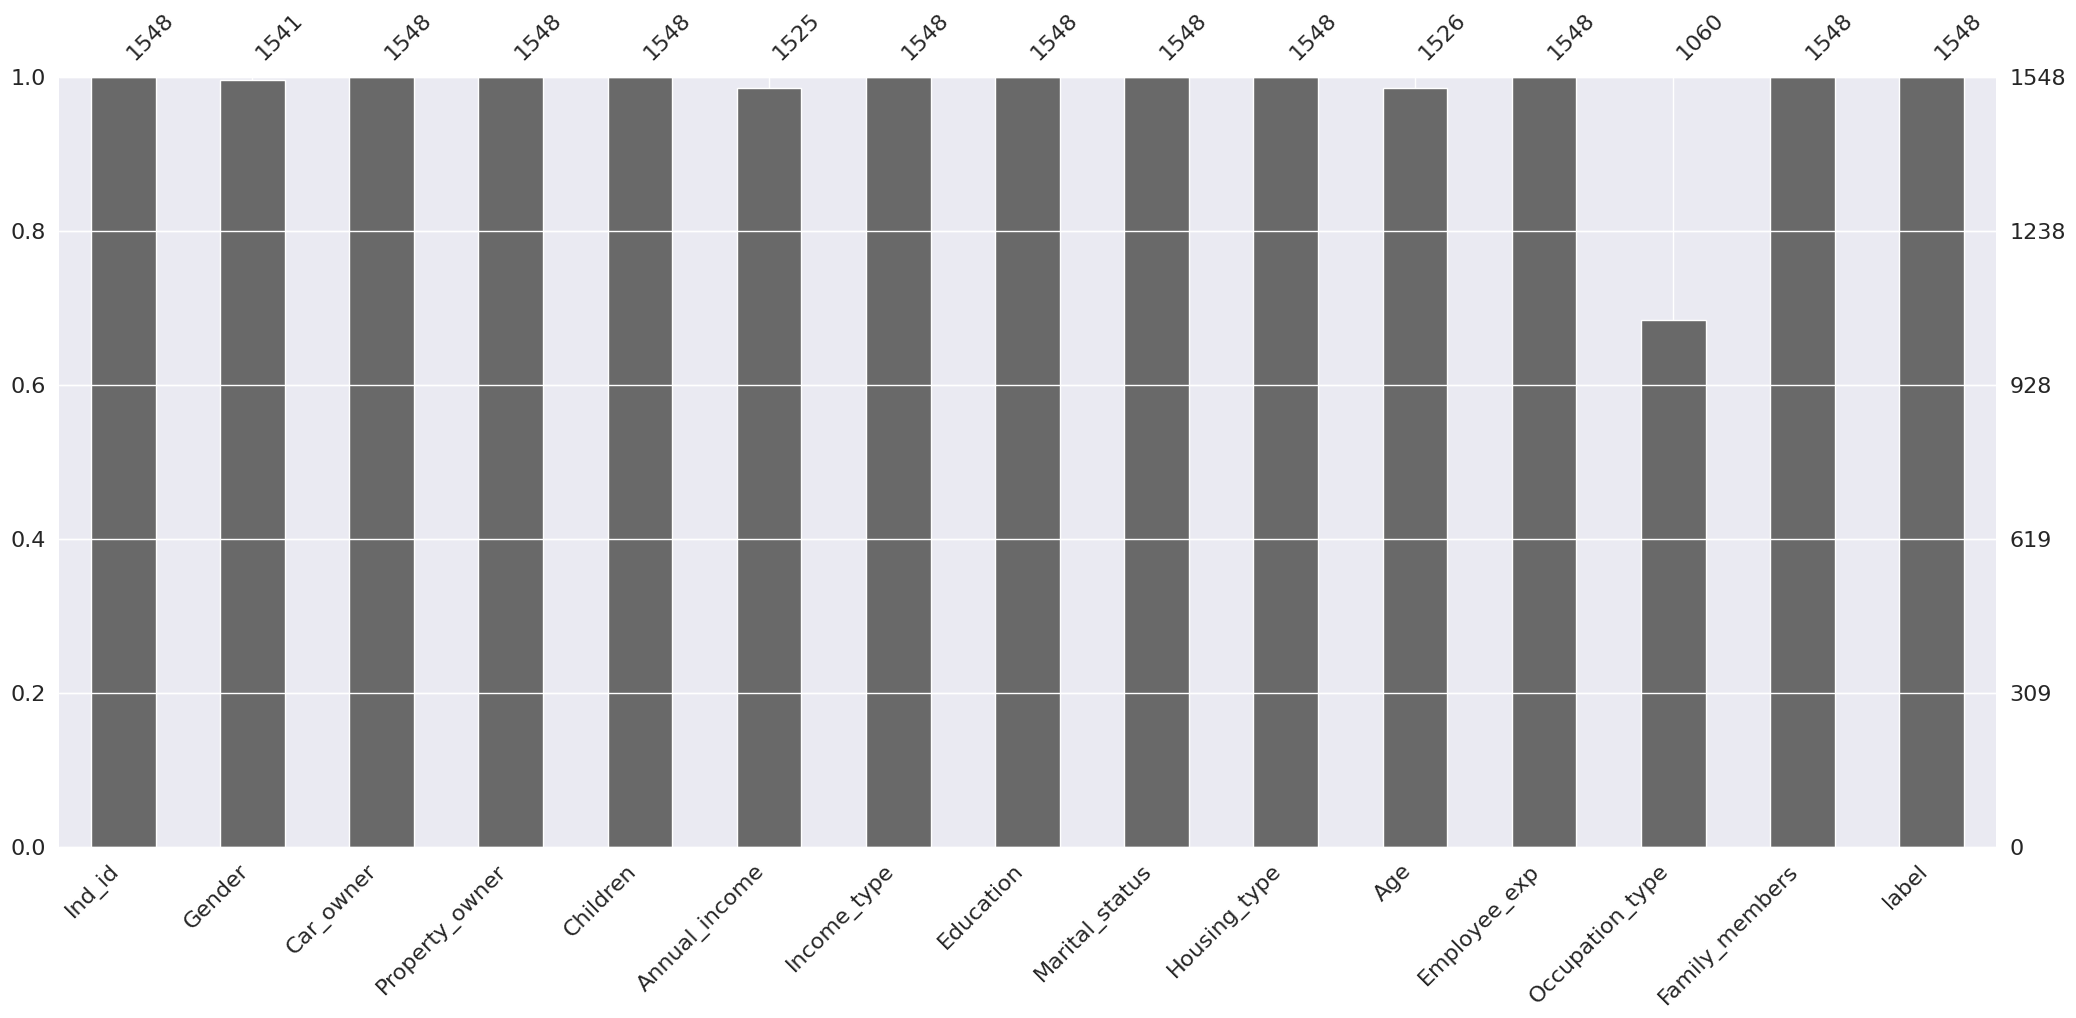

In [ ]:
import missingno as msno  #library to visualised missing value
msno.bar(d) #creating bar plot to observe the missing value

There are missing values in few columns.

<Axes: >

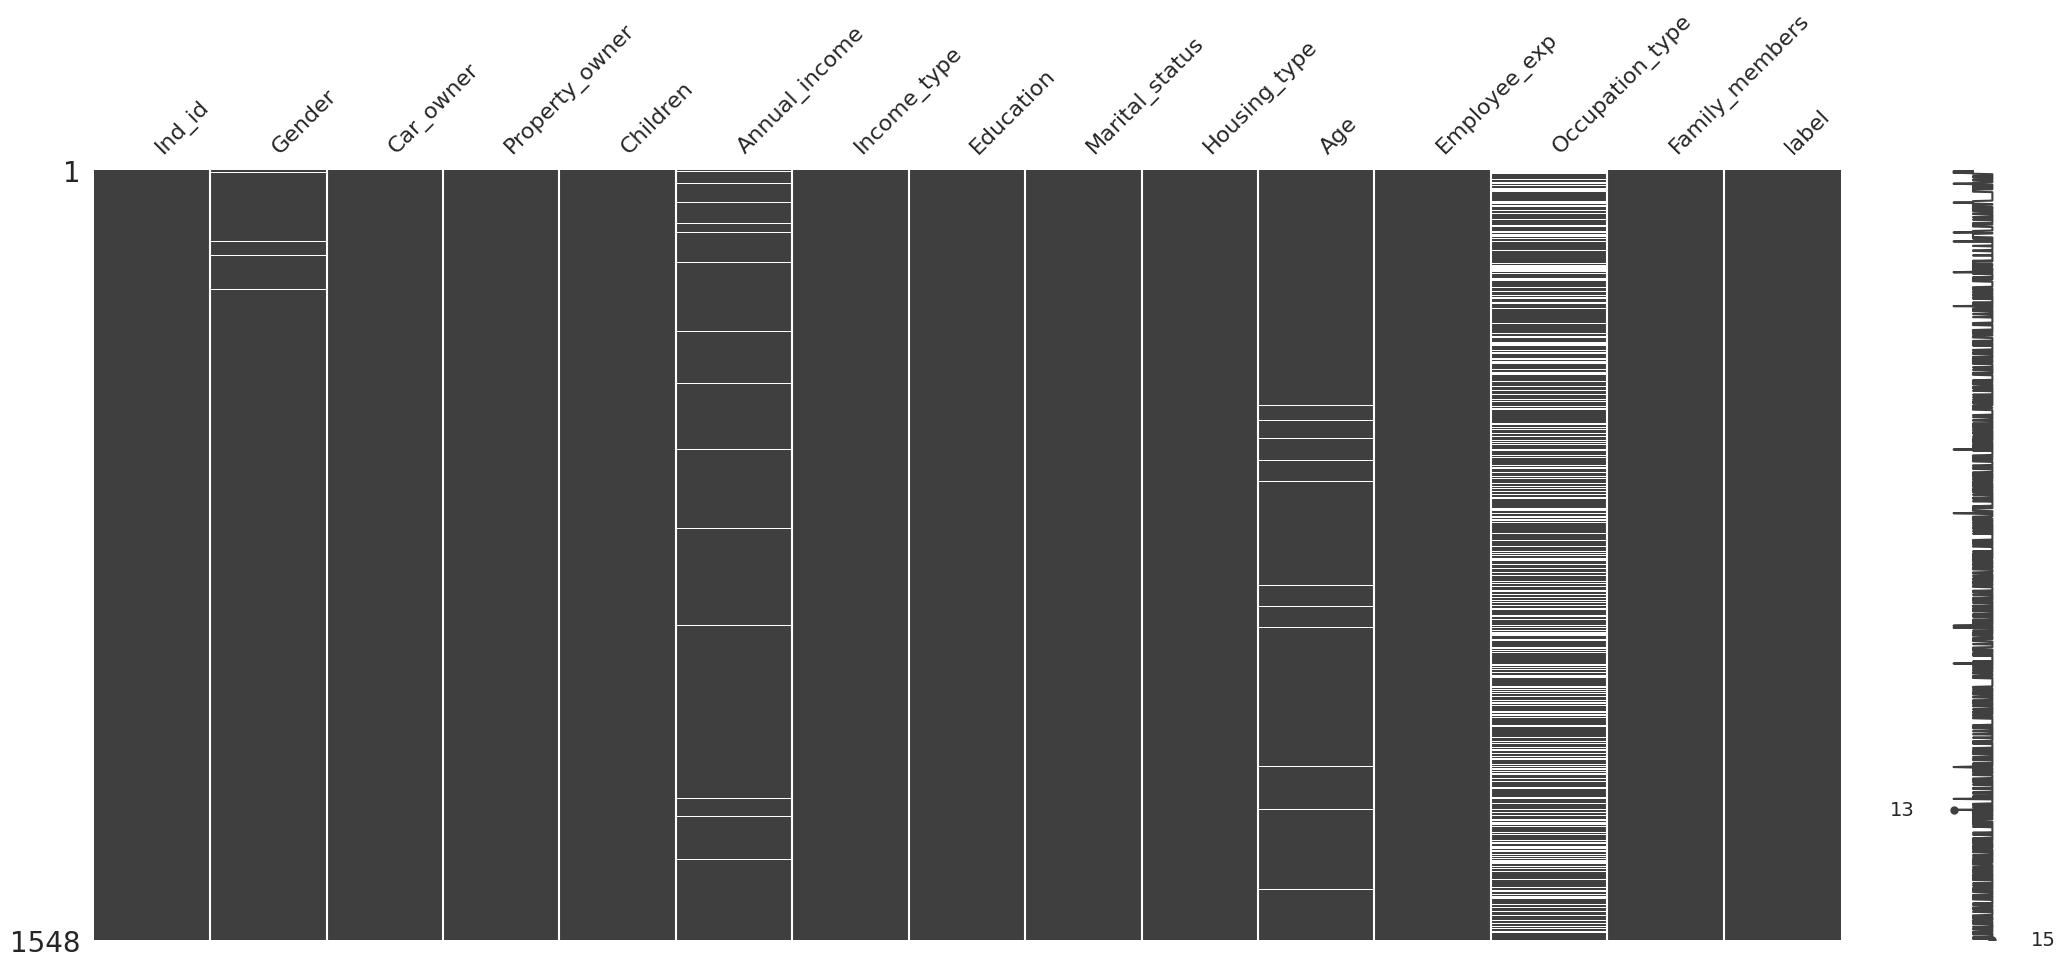

In [ ]:
msno.matrix(d) # creating matrix plot to see the pattern in missing values

**Missing values will be white line**

The Spark line on the right summarizes the general shape of data of completeness and points out the row, the minimal number of null values and total count of the columns at the bottom.

**Finding correlation between missing values**

<Axes: >

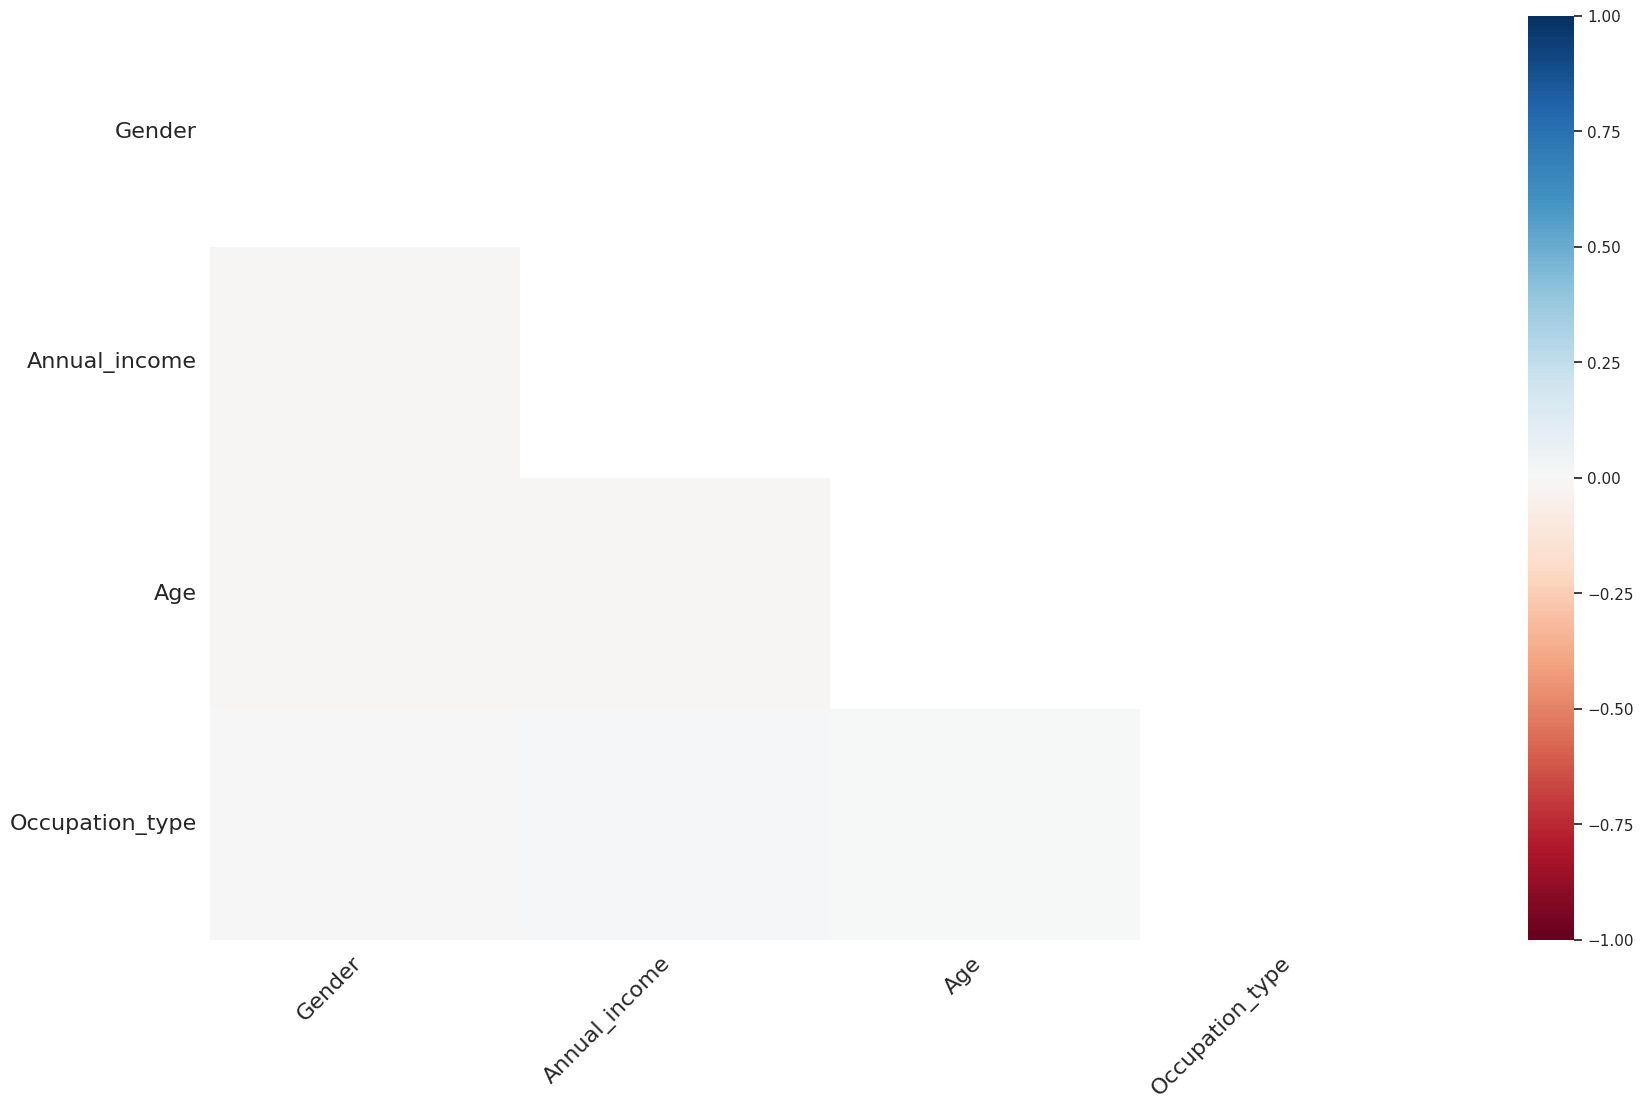

In [ ]:
msno.heatmap(d) #creating heatmap of correlation

**Dealing with NAN and extreme values:**

In [ ]:
d.Occupation_type.replace(np.nan, 'Others',inplace = True)
d.Occupation_type.value_counts() #replacing the nan value with others

Others                   488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Occupation_type, dtype: int64

In [ ]:
d['Occupation_type'].isnull().sum() #to check the presence of null value

0

There is no null value left in the occupation type attribute.

In [ ]:
d=d.dropna(subset=['Gender']) #to delete nan value in gwnder as it is less than 1%.
d['Gender'].isnull().sum()



0

<Axes: xlabel='Employee_exp', ylabel='Density'>

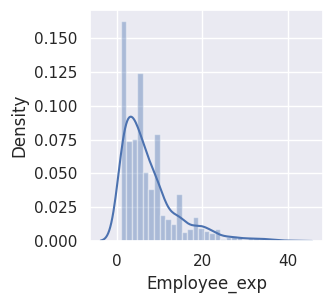

In [ ]:
# replacing the extreme values with zero.
d['Employee_exp'].replace(1001.0,np.nan,inplace=True)
d['Employee_exp'].replace(0,np.nan,inplace=True)
sns.distplot(d['Employee_exp'])



In [ ]:
d.isnull().sum()

Ind_id               0
Gender               0
Car_owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employee_exp       304
Occupation_type      0
Family_members       0
label                0
dtype: int64

In [ ]:
dataset = d[['Ind_id','Annual_income','Age','Employee_exp']]
dataset

,Ind_id,Annual_income,Age,Employee_exp
0,5008827,180000.0,51.0,NaN
1,5009744,315000.0,37.0,2.0
2,5009746,315000.0,NaN,2.0
3,5009749,NaN,37.0,2.0
4,5009752,315000.0,37.0,2.0
...,...,...,...,...
1543,5028645,NaN,33.0,6.0
1544,5023655,225000.0,28.0,3.0
1545,5115992,180000.0,36.0,7.0
1546,5118219,270000.0,42.0,2.0


## **Dealing with outliers**
 Using the new dataset that includes only non-categorical data.

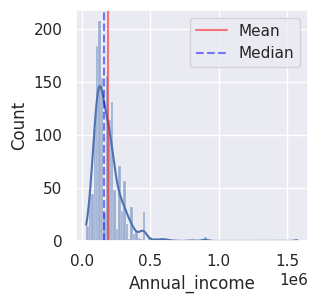

In [ ]:
sns.histplot(data = dataset['Annual_income'], kde = True) #to visualise the presence of outliers
plt.axvline(x=dataset.Annual_income.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()


<Axes: >

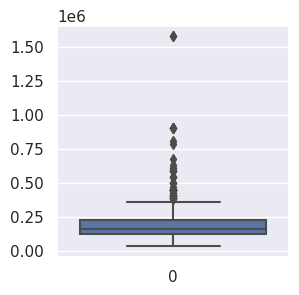

In [ ]:
sns.boxplot(dataset['Annual_income']) #to visualised the presence of outliers.

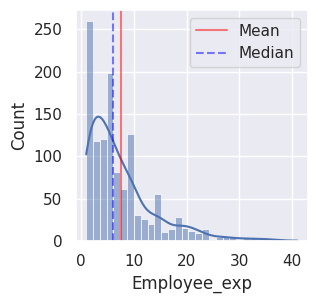

In [ ]:
sns.histplot(data = dataset['Employee_exp'], kde = True) #to visualise the presence of outliers
plt.axvline(x=dataset.Employee_exp.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset.Employee_exp.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()


<Axes: >

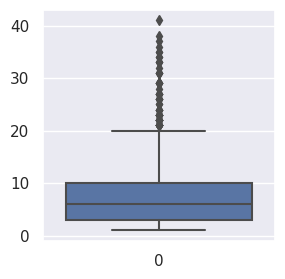

In [ ]:
sns.boxplot(dataset['Employee_exp']) #to visualised the outliers

The graph is rightly skewed i.e. mean is less than median.

# **Z- Score**

In [ ]:
# for Annual_income
z = np.abs(stats.zscore(dataset['Annual_income']))
print(z)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1543   NaN
1544   NaN
1545   NaN
1546   NaN
1547   NaN
Name: Annual_income, Length: 1541, dtype: float64


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [ ]:
threshold = -3
print(np.where(z < -3))

(array([], dtype=int64),)


In [ ]:
# for Employee_exp
z = np.abs(stats.zscore(dataset['Employee_exp']))
print(z)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1543   NaN
1544   NaN
1545   NaN
1546   NaN
1547   NaN
Name: Employee_exp, Length: 1541, dtype: float64


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [ ]:
threshold = -3
print(np.where(z < -3))

(array([], dtype=int64),)


## **IQR**

In [ ]:
Q1 = np.percentile(dataset['Annual_income'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dataset['Annual_income'], 50, interpolation = 'midpoint')
Q3 = np.percentile(dataset['Annual_income'], 75, interpolation = 'midpoint')

In [ ]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in dataset['Annual_income']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is nan
low_limit is nan
up_limit is nan
 outlier in the dataset is []


In [ ]:
Q1 = np.percentile(dataset['Employee_exp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dataset['Employee_exp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(dataset['Employee_exp'], 75, interpolation = 'midpoint')

In [ ]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in dataset['Employee_exp']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is nan
low_limit is nan
up_limit is nan
 outlier in the dataset is []


## Log transformation

In [ ]:
#creating log-transformed data for Annual Income
dataset['Annual_income'] = np.log(dataset['Annual_income'])
dataset

,Ind_id,Annual_income,Age,Employee_exp
0,5008827,12.100712,51.0,NaN
1,5009744,12.660328,37.0,2.0
2,5009746,12.660328,NaN,2.0
3,5009749,NaN,37.0,2.0
4,5009752,12.660328,37.0,2.0
...,...,...,...,...
1543,5028645,NaN,33.0,6.0
1544,5023655,12.323856,28.0,3.0
1545,5115992,12.100712,36.0,7.0
1546,5118219,12.506177,42.0,2.0


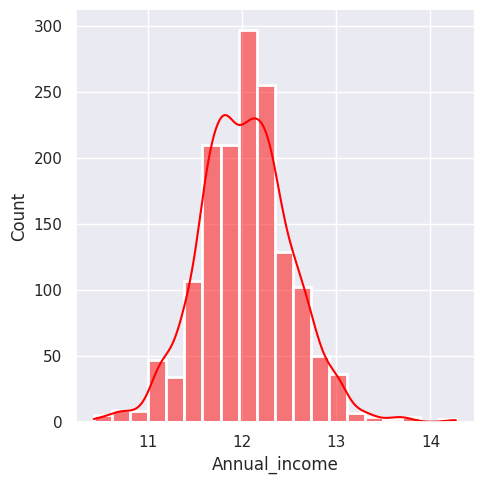

In [ ]:
sns.displot(data=dataset, x='Annual_income', kde=True, bins=20, color='red', linewidth=2)

In [ ]:
#creating log-transformed data for Employee experience
dataset['Employee_exp'] = np.log(dataset['Employee_exp'])
dataset

,Ind_id,Annual_income,Age,Employee_exp
0,5008827,12.100712,51.0,NaN
1,5009744,12.660328,37.0,0.693147
2,5009746,12.660328,NaN,0.693147
3,5009749,NaN,37.0,0.693147
4,5009752,12.660328,37.0,0.693147
...,...,...,...,...
1543,5028645,NaN,33.0,1.791759
1544,5023655,12.323856,28.0,1.098612
1545,5115992,12.100712,36.0,1.945910
1546,5118219,12.506177,42.0,0.693147


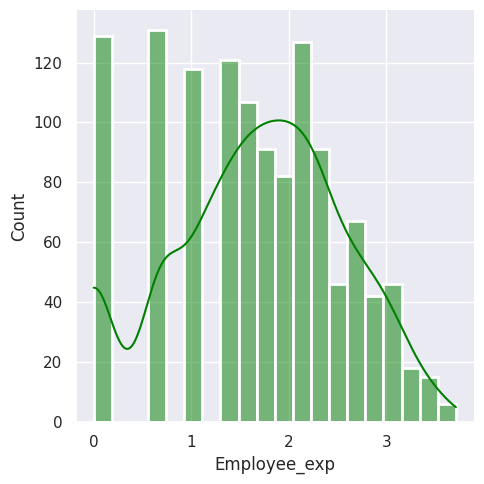

In [ ]:
sns.displot(data=dataset, x='Employee_exp', kde=True, bins=20, color='green', linewidth=2)

## Square root transformation

In [ ]:
# Square root transformation of Annual income
dataset['Annual_income'] = np.sqrt(dataset['Annual_income'])

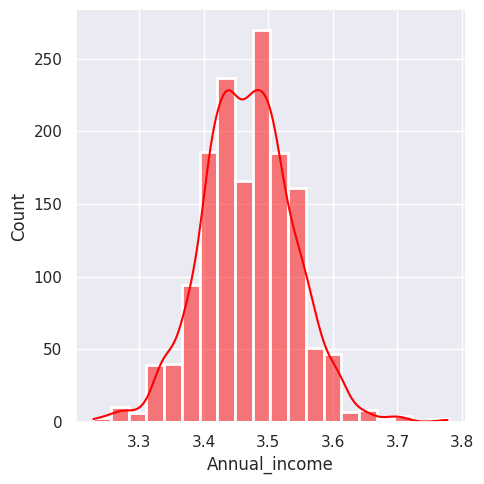

In [ ]:
sns.displot(data=dataset, x='Annual_income', kde=True, bins=20, color='red', linewidth=2)

In [ ]:
# Square root transformation of Employee experience
dataset['Employee_exp'] = np.sqrt(dataset['Employee_exp'])

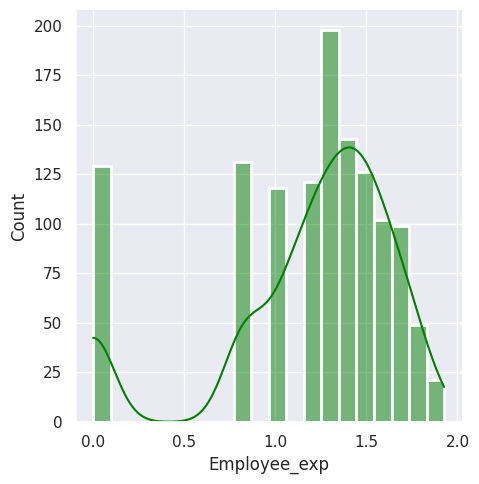

In [ ]:
sns.displot(data=dataset, x='Employee_exp', kde=True, bins=20, color='green', linewidth=2)

## **Basic Imputation For Missing Values**

**Mean Imputation**

In [ ]:
from sklearn.impute import SimpleImputer # importing simple imputer
dataset_mean = dataset.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
dataset_mean.iloc[:, :] = mean_imputer.fit_transform(dataset_mean) #  both fit a model to the data and then transform the data using that model

**Median Imputation**

In [ ]:
dataset_median =dataset.copy(deep = True)
median_imputer= SimpleImputer(strategy= 'median') #using median to impute the value
dataset_median.iloc[:, :]= median_imputer.fit_transform(dataset_median)

**Mode Imputation**


In [ ]:
dataset_mode =dataset.copy(deep = True)
mode_imputer= SimpleImputer(strategy= 'most_frequent') #using most frequent i.e mode to impute the value
dataset_mode.iloc[:, :]= mode_imputer.fit_transform(dataset_mode)

**Constant Imputation**

In [ ]:
dataset_constant =dataset.copy(deep = True)
constant_imputer= SimpleImputer(strategy= 'constant', fill_value= 0) #using mode to impute the value
dataset_constant.iloc[:, :]= constant_imputer.fit_transform(dataset_constant)

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=72e7fe3d113132378a6bcd03bad326257eb6d27a24e3aa12614ff4857dd3db25
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=dcb35273020d211e3032c404e9aa6efd0a52c44c92402db43923839b58f2a382
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


**Advance Imputation for missing values**

In [ ]:
from fancyimpute import KNN # importing KNN library
knn_imputer = KNN() # calling KNN function
dataset_knn = dataset.copy(deep=True) # creating copy
dataset_knn.iloc[:, :] = knn_imputer.fit_transform(dataset_knn)

Imputing row 1/1541 with 1 missing, elapsed time: 0.351
Imputing row 101/1541 with 0 missing, elapsed time: 0.353
Imputing row 201/1541 with 0 missing, elapsed time: 0.354
Imputing row 301/1541 with 1 missing, elapsed time: 0.356
Imputing row 401/1541 with 0 missing, elapsed time: 0.357
Imputing row 501/1541 with 0 missing, elapsed time: 0.358
Imputing row 601/1541 with 1 missing, elapsed time: 0.360
Imputing row 701/1541 with 0 missing, elapsed time: 0.361
Imputing row 801/1541 with 0 missing, elapsed time: 0.362
Imputing row 901/1541 with 0 missing, elapsed time: 0.364
Imputing row 1001/1541 with 0 missing, elapsed time: 0.365
Imputing row 1101/1541 with 0 missing, elapsed time: 0.366
Imputing row 1201/1541 with 0 missing, elapsed time: 0.367
Imputing row 1301/1541 with 1 missing, elapsed time: 0.369
Imputing row 1401/1541 with 0 missing, elapsed time: 0.370
Imputing row 1501/1541 with 0 missing, elapsed time: 0.372


In [ ]:
from fancyimpute import IterativeImputer # importing iterative imputers
MICE_imputer = IterativeImputer() # calling iterativeIMputer
dataset_MICE = dataset.copy(deep=True) # creating a copy of dataset
dataset_MICE.iloc[:, :] = MICE_imputer.fit_transform(dataset_MICE)

In [ ]:
dataset_knn.head() #observing the first five rows

,Ind_id,Annual_income,Age,Employee_exp
0,5008827.0,3.478608,51.000000,1.379263
1,5009744.0,3.558135,37.000000,0.832555
2,5009746.0,3.558135,37.156088,0.832555
3,5009749.0,3.552594,37.000000,0.832555
4,5009752.0,3.558135,37.000000,0.832555


In [ ]:
dataset_MICE.head() #observing the first five rows

,Ind_id,Annual_income,Age,Employee_exp
0,5008827.0,3.478608,51.000000,1.321544
1,5009744.0,3.558135,37.000000,0.832555
2,5009746.0,3.558135,40.829975,0.832555
3,5009749.0,3.471618,37.000000,0.832555
4,5009752.0,3.558135,37.000000,0.832555


## Visualisation Imputation

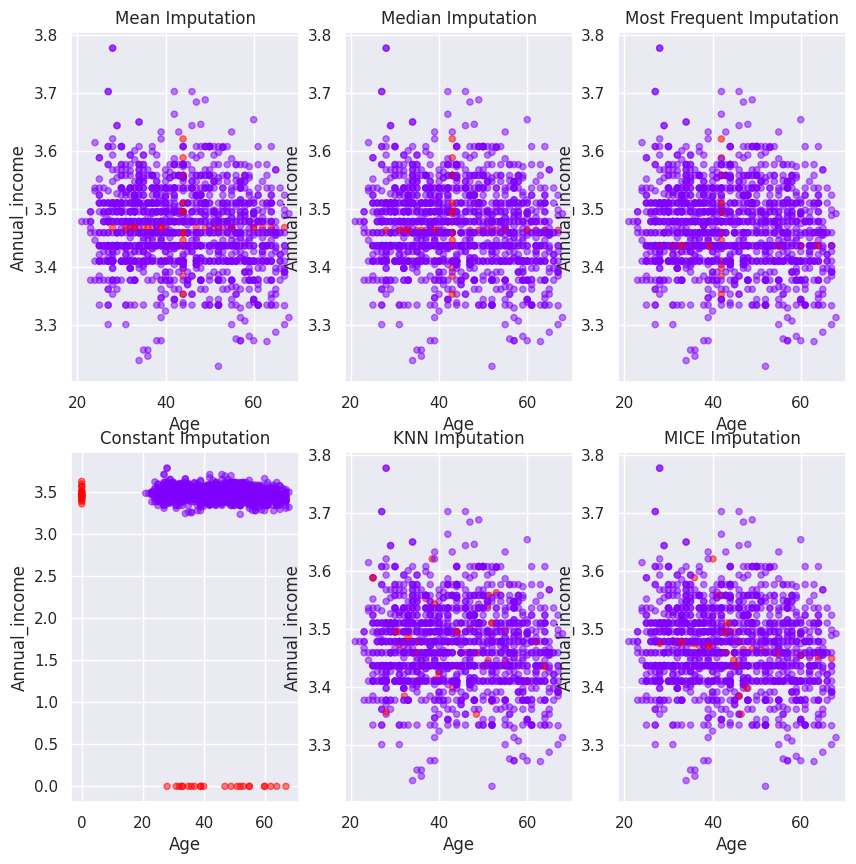

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 2 rows and 3 columns
nullity = dataset['Age'].isnull() + dataset['Annual_income'].isnull() # creating null columns between Age and Annual income
imputations = {'Mean Imputation': dataset_mean, # creating a python dictionary
               'Median Imputation': dataset_median,
               'Most Frequent Imputation':dataset_mode,
               'Constant Imputation': dataset_constant,
               'KNN Imputation': dataset_knn,
              'MICE Imputation': dataset_MICE}

for ax, d_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[d_key].plot(x='Age', y='Annual_income', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=d_key)

In [ ]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
dataset_knn = dataset.copy(deep=True)
dataset_knn.iloc[:,:] = knn_imputer.fit_transform(dataset_knn)

Imputing row 1/1541 with 1 missing, elapsed time: 0.501
Imputing row 101/1541 with 0 missing, elapsed time: 0.504
Imputing row 201/1541 with 0 missing, elapsed time: 0.506
Imputing row 301/1541 with 1 missing, elapsed time: 0.508
Imputing row 401/1541 with 0 missing, elapsed time: 0.510
Imputing row 501/1541 with 0 missing, elapsed time: 0.512
Imputing row 601/1541 with 1 missing, elapsed time: 0.514
Imputing row 701/1541 with 0 missing, elapsed time: 0.516
Imputing row 801/1541 with 0 missing, elapsed time: 0.517
Imputing row 901/1541 with 0 missing, elapsed time: 0.518
Imputing row 1001/1541 with 0 missing, elapsed time: 0.520
Imputing row 1101/1541 with 0 missing, elapsed time: 0.521
Imputing row 1201/1541 with 0 missing, elapsed time: 0.522
Imputing row 1301/1541 with 1 missing, elapsed time: 0.524
Imputing row 1401/1541 with 0 missing, elapsed time: 0.525
Imputing row 1501/1541 with 0 missing, elapsed time: 0.527


In [ ]:
d.head()

,Ind_id,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Age,Employee_exp,Occupation_type,Family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,NaN,Others,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Others,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,Others,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Others,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,Others,2,1


In [ ]:
#Merging of datasets
d= d.drop(['Annual_income','Age','Employee_exp'], axis=1) #dropping of the column having missing values
d

,Ind_id,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members,label
0,5008827,M,Y,Y,0,Pensioner,Higher education,Married,House / apartment,Others,2,1
1,5009744,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
2,5009746,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
3,5009749,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
4,5009752,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,Commercial associate,Higher education,Married,House / apartment,Managers,2,0
1544,5023655,F,N,N,0,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants,1,0
1545,5115992,M,Y,Y,2,Working,Higher education,Married,House / apartment,Managers,4,0
1546,5118219,M,Y,N,0,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers,2,0


In [ ]:
df1 = pd.merge(dataset_knn,d) #Merging of two dataset
df=df1.copy()# creating a copy
df

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members,label
0,5008827.0,3.478608,51.000000,1.379263,M,Y,Y,0,Pensioner,Higher education,Married,House / apartment,Others,2,1
1,5009744.0,3.558135,37.000000,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
2,5009746.0,3.558135,37.156088,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
3,5009749.0,3.552594,37.000000,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
4,5009752.0,3.558135,37.000000,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645.0,3.485998,33.000000,1.338566,F,N,Y,0,Commercial associate,Higher education,Married,House / apartment,Managers,2,0
1537,5023655.0,3.510535,28.000000,1.048147,F,N,N,0,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants,1,0
1538,5115992.0,3.478608,36.000000,1.394959,M,Y,Y,2,Working,Higher education,Married,House / apartment,Managers,4,0
1539,5118219.0,3.536407,42.000000,0.832555,M,Y,N,0,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers,2,0


In [ ]:
# Export to CSV file
df.to_csv("Creditcardapproval(n).csv",index=False)

In [ ]:
df.head()

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members,label
0,5008827.0,3.478608,51.000000,1.379263,M,Y,Y,0,Pensioner,Higher education,Married,House / apartment,Others,2,1
1,5009744.0,3.558135,37.000000,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
2,5009746.0,3.558135,37.156088,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
3,5009749.0,3.552594,37.000000,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1
4,5009752.0,3.558135,37.000000,0.832555,F,Y,N,0,Commercial associate,Higher education,Married,House / apartment,Others,2,1


**Conversion of Categorical Value using label encoder:**
As there is no ordinal relationship therfore,we are using label encoder for encoding categorical data.

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['M' 'F']
Car_owner
['Y' 'N']
Property_owner
['Y' 'N']
Income_type
['Pensioner' 'Commercial associate' 'Working' 'State servant']
Education
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Marital_status
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Occupation_type
['Others' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'Managers' 'Cleaning staff' 'Drivers' 'Low-skill Laborers'
 'High skill tech staff' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'
 'Secretaries' 'Realty agents']


In [ ]:
# Converting males to 1 and females to 0
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()



array([1, 0])

In [ ]:
# converting Property owner Y to 1 and N to 0
label_encoder = preprocessing.LabelEncoder()
df['Property_owner']= label_encoder.fit_transform(df['Property_owner'])
df['Property_owner'].unique()

array([1, 0])

In [ ]:
# converting  Car_owner Y to 1 and N=0
label_encoder = preprocessing.LabelEncoder()
df['Car_owner']= label_encoder.fit_transform(df['Car_owner'])
df['Car_owner'].unique()

array([1, 0])

In [ ]:
# Converting Education
label_encoder = preprocessing.LabelEncoder()
df['Education']= label_encoder.fit_transform(df['Education'])
df['Education'].unique()

array([1, 4, 3, 2, 0])

In [ ]:
# Converting Income_type
label_encoder = preprocessing.LabelEncoder()
df['Income_type']= label_encoder.fit_transform(df['Income_type'])
df['Income_type'].unique()

array([1, 0, 3, 2])

In [ ]:
# Converting Marital Status
label_encoder = preprocessing.LabelEncoder()
df['Marital_status']= label_encoder.fit_transform(df['Marital_status'])
df['Marital_status'].unique()

array([1, 3, 0, 2, 4])

In [ ]:
# Converting Housing_type
label_encoder = preprocessing.LabelEncoder()
df['Housing_type']= label_encoder.fit_transform(df['Housing_type'])
df['Housing_type'].unique()

array([1, 5, 4, 2, 0, 3])

In [ ]:
# Converting Occupation type
label_encoder = preprocessing.LabelEncoder()
df['Occupation_type']= label_encoder.fit_transform(df['Occupation_type'])
df['Occupation_type'].unique()

array([12,  3,  2,  8, 15,  0, 10,  1,  4,  9,  6,  7, 18, 17, 11, 13,  5,
       16, 14])

In [ ]:
df #to check out the conversion

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members,label
0,5008827.0,3.478608,51.000000,1.379263,1,1,1,0,1,1,1,1,12,2,1
1,5009744.0,3.558135,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2,1
2,5009746.0,3.558135,37.156088,0.832555,0,1,0,0,0,1,1,1,12,2,1
3,5009749.0,3.552594,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2,1
4,5009752.0,3.558135,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,5028645.0,3.485998,33.000000,1.338566,0,0,1,0,0,1,1,1,10,2,0
1537,5023655.0,3.510535,28.000000,1.048147,0,0,0,0,0,2,3,1,0,1,0
1538,5115992.0,3.478608,36.000000,1.394959,1,1,1,2,3,1,1,1,10,4,0
1539,5118219.0,3.536407,42.000000,0.832555,1,1,0,0,3,4,0,1,4,2,0


In [ ]:
df.isnull().sum() #to check on the presence of null values

Ind_id             0
Annual_income      0
Age                0
Employee_exp       0
Gender             0
Car_owner          0
Property_owner     0
Children           0
Income_type        0
Education          0
Marital_status     0
Housing_type       0
Occupation_type    0
Family_members     0
label              0
dtype: int64

# **Data Pre processing with df_knn dataset**

Splitting of independent and dependent variable.

In [ ]:
X = df.drop(columns = 'label',axis = 1)
X.head()

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members
0,5008827.0,3.478608,51.000000,1.379263,1,1,1,0,1,1,1,1,12,2
1,5009744.0,3.558135,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2
2,5009746.0,3.558135,37.156088,0.832555,0,1,0,0,0,1,1,1,12,2
3,5009749.0,3.552594,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2
4,5009752.0,3.558135,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2


In [ ]:
y = df['label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Splitting into Test and Train data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_test

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members
1125,5028930.0,3.410382,47.0,1.268636,0,1,1,0,3,4,1,1,15,2
1206,5047787.0,3.510535,29.0,1.048147,0,1,1,0,0,1,1,1,12,2
996,5028569.0,3.558135,43.0,1.645615,0,1,1,0,0,4,1,1,3,2
1228,5009207.0,3.547706,57.0,1.782710,0,0,0,0,2,4,1,1,0,2
891,5079075.0,3.504716,43.0,1.177410,0,0,1,0,3,4,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,5090082.0,3.478608,41.0,1.268636,1,0,0,0,0,4,1,1,12,2
1358,5025951.0,3.432073,37.0,1.645615,0,0,1,0,3,4,1,1,3,2
120,5116302.0,3.478608,62.0,1.408554,0,0,1,0,1,4,1,1,12,2
701,5022954.0,3.410382,50.0,0.000000,1,1,1,0,3,4,1,1,12,2


In [ ]:
X_train

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members
83,5078820.0,3.510535,40.0,1.624518,0,0,0,2,0,4,1,1,6,4
1066,5113057.0,3.495496,39.0,1.177410,0,1,0,0,0,2,2,1,0,1
602,5023177.0,3.567817,49.0,1.601546,0,0,1,1,3,4,0,1,8,3
186,5097169.0,3.377509,29.0,0.832555,0,0,0,0,0,4,3,1,15,1
622,5045828.0,3.536407,61.0,1.624653,0,0,1,0,1,1,1,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,5117716.0,3.558135,46.0,1.624518,1,1,0,0,3,4,1,1,4,2
905,5105159.0,3.607908,34.0,1.338566,1,0,1,2,0,1,1,1,10,4
1096,5149327.0,3.478608,52.0,1.665109,0,1,1,1,3,1,2,1,10,2
235,5090470.0,3.702722,42.0,1.576359,1,0,1,1,3,4,1,1,8,3


In [ ]:
y_train

83      1
1066    0
602     0
186     0
622     0
       ..
715     0
905     0
1096    0
235     0
1061    0
Name: label, Length: 1232, dtype: int64

In [ ]:
y_test

1125    0
1206    0
996     0
1228    0
891     0
       ..
945     0
1358    0
120     1
701     0
453     0
Name: label, Length: 309, dtype: int64

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1541, 14) (1232, 14) (309, 14)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(1541,) (1232,) (309,)


In [ ]:
df.isnull().sum()

Ind_id             0
Annual_income      0
Age                0
Employee_exp       0
Gender             0
Car_owner          0
Property_owner     0
Children           0
Income_type        0
Education          0
Marital_status     0
Housing_type       0
Occupation_type    0
Family_members     0
label              0
dtype: int64

## **Data Pre processing with df dataset**

Splitting of independent and dependent variable.

In [ ]:
X = df.drop(columns = 'label',axis = 1)
X.head()

,Ind_id,Annual_income,Age,Employee_exp,Gender,Car_owner,Property_owner,Children,Income_type,Education,Marital_status,Housing_type,Occupation_type,Family_members
0,5008827.0,3.478608,51.000000,1.379263,1,1,1,0,1,1,1,1,12,2
1,5009744.0,3.558135,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2
2,5009746.0,3.558135,37.156088,0.832555,0,1,0,0,0,1,1,1,12,2
3,5009749.0,3.552594,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2
4,5009752.0,3.558135,37.000000,0.832555,0,1,0,0,0,1,1,1,12,2


In [ ]:
y = df['label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Splitting into Test and Train data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1541, 14) (1232, 14) (309, 14)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(1541,) (1232,) (309,)


**MODEL TRAINING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

**Feature Scaling**

In [ ]:
### Crating a standard scaler object
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [ ]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.00751342,  0.61362438, -0.35486161, ..., -0.30626593,
        -0.73187822,  2.07114532],
       [ 0.83327985,  0.39976398, -0.44146088, ..., -0.30626593,
        -2.152583  , -1.28923795],
       [-1.33454696,  1.42822711,  0.42453186, ..., -0.30626593,
        -0.25830996,  0.95101756],
       ...,
       [ 1.70808045,  0.15959392,  0.68432969, ..., -0.30626593,
         0.2152583 , -0.1691102 ],
       [ 0.28850121,  3.34668085, -0.18166306, ..., -0.30626593,
        -0.25830996,  0.95101756],
       [ 0.90438302,  3.34668085,  0.16473404, ..., -0.30626593,
        -0.73187822,  0.95101756]])

In [ ]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-1.19578964, -0.81062601,  0.25133331, ..., -0.30626593,
         1.39917895, -0.1691102 ],
       [-0.74097533,  0.61362438, -1.30745363, ..., -0.30626593,
         0.68882656, -0.1691102 ],
       [-1.20449665,  1.29054236, -0.09506378, ..., -0.30626593,
        -1.44223061, -0.1691102 ],
       ...,
       [ 0.9115464 ,  0.15959392,  1.55032243, ..., -0.30626593,
         0.68882656, -0.1691102 ],
       [-1.33992552, -0.81062601,  0.51113114, ..., -0.30626593,
         0.68882656, -0.1691102 ],
       [-0.58658883, -0.43197648, -1.13425508, ..., -0.30626593,
         1.39917895, -0.1691102 ]])

**LOGISTIC REGRESSION**

In [ ]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [ ]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test) #Using above model to get the prediction of test data
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Performance Matrics**

 ***Confusion Matrix***

In [ ]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred) #Confusion matrics
confusion_mat

array([[276,   1],
       [ 32,   0]])

In [ ]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.89


In [ ]:
print(round(precision_score(y_test, logistic_reg_pred), 2)) #Precision score

0.0


In [ ]:
print(round(recall_score(y_test, logistic_reg_pred), 2)) #Recall Score

0.0


**F-1 Score**:

Giving equal importance to falsely positive and falsely negative



In [ ]:
from sklearn.metrics import f1_score
print(round(f1_score(y_test, logistic_reg_pred), 2))

0.0


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.4981949458483754

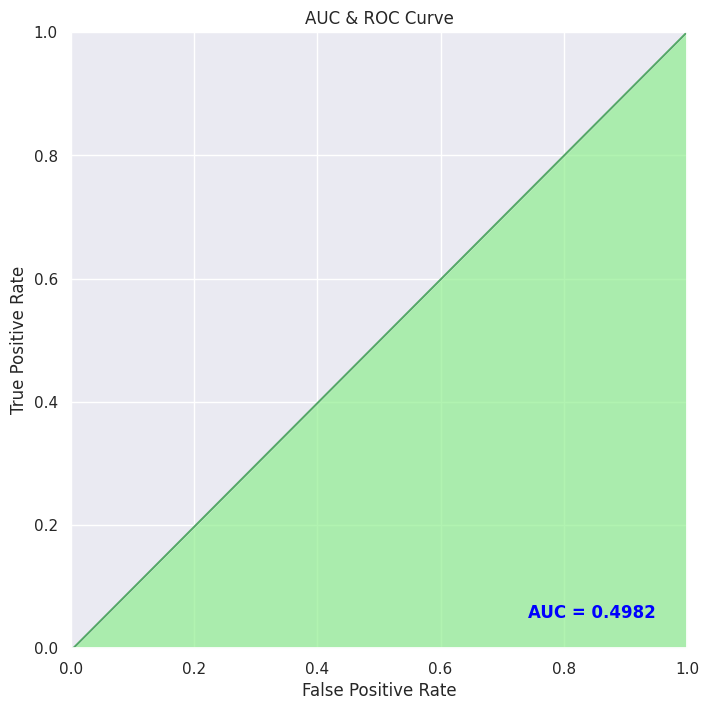

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, logistic_reg.predict_proba(X_test))
logloss

0.34335665276637706

 this value represents log-loss, a lower value indicates better performance.

**XG BOOST**

In [ ]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [ ]:
X = df.drop(['label'], axis=1)
y = df['label']

In [ ]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
df_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  #For splitting the test data

In [ ]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[12:49:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# we have to Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.336078


In [ ]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}

In [ ]:
cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:49:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Extracting and printing the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    0.309857
Name: test-rmse-mean, dtype: float64


The overall interpretation of this result is that the XGBoost model, after 49 boosting rounds, achieved a test RMSE of approximately 0.309857.

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.8867 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       278
           1       0.45      0.58      0.51        31

    accuracy                           0.89       309
   macro avg       0.70      0.75      0.72       309
weighted avg       0.90      0.89      0.89       309



In summary, the model performs well for class 0 but has room for improvement in class 1 predictions


**Random forest regression**

In [ ]:
# Importing library
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# performing prediction
y_pred = regressor.predict(X_test)
y_pred

array([0.07, 0.19, 0.01, 0.01, 0.08, 0.1 , 0.11, 0.07, 0.58, 0.14, 0.05,
       0.01, 0.67, 0.  , 0.89, 0.11, 0.01, 0.17, 0.29, 0.04, 0.  , 0.07,
       0.02, 0.04, 0.15, 0.  , 0.  , 0.02, 0.08, 0.01, 0.21, 0.06, 0.79,
       0.1 , 0.1 , 0.28, 0.64, 0.  , 0.01, 0.08, 0.37, 0.11, 0.06, 0.09,
       0.34, 0.06, 0.13, 0.15, 0.  , 0.05, 0.1 , 0.08, 0.12, 0.2 , 0.14,
       0.1 , 0.02, 0.02, 0.25, 0.09, 0.02, 0.06, 0.  , 0.17, 0.01, 0.29,
       0.14, 0.04, 0.01, 0.06, 0.01, 0.05, 0.65, 0.  , 0.16, 0.12, 0.83,
       0.08, 0.15, 0.29, 0.09, 0.  , 0.4 , 0.04, 0.01, 0.19, 0.1 , 0.1 ,
       0.  , 0.24, 0.04, 0.12, 0.09, 0.06, 0.  , 0.16, 0.29, 0.05, 0.11,
       0.05, 0.13, 0.07, 0.35, 0.24, 0.03, 0.05, 0.41, 0.02, 0.05, 0.05,
       0.04, 0.03, 0.01, 0.05, 0.2 , 0.19, 0.03, 0.23, 0.01, 0.11, 0.01,
       0.06, 0.11, 0.71, 0.09, 0.17, 0.03, 0.16, 0.13, 0.08, 0.04, 0.29,
       0.36, 0.01, 0.09, 0.  , 0.11, 0.14, 0.33, 0.02, 0.01, 0.  , 0.12,
       0.1 , 0.13, 0.03, 0.06, 0.08, 0.02, 0.16, 0.

In [ ]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.14961165048543687
MSE: 0.061842394822006465
RMSE: 0.24868131176669964


In summary, the metrics  suggest that the model's predictions are relatively accurate based on the current evaluation, as the values of MAE, MSE and RMSE are lower.

By comparing all four models, according to me random forest model is better as RMSE value is comparatively less than all other model.